In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils as u
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import result_gen_utils as ru
from repo_tsne import Repo_TSNE
import os


# results

In [4]:
# first get the data points that lie close

In [5]:
# get the file names
train_files, test_files = u.train_test_half_vids('/data/home/shruti/voxceleb/vgg/leaders/')
all_lbls = list(train_files.keys())
all_lbls.sort()
all_lbls = np.array(all_lbls)

before 4105
after 3739


In [6]:

# repo with leaders + ff original + imposters + Google
def get_train_repo(params):
    
    out_repo = Repo_TSNE(params['bsfldr'], params['frames'], params['steps'], np.mean, 20)
    out_repo.add_ids({f: train_files[f] for f in ['bo','bs','dt','ew','hc','jb',
                                                  'bo_imposter','bs_imposter','ew_imposter','dt_imposter',
                                                   'hc_imposter', 'jb_imposter']})
    out_repo.add_ids({f: train_files[f] for f in train_files.keys() if 'GG_' in f})
    out_repo.add_ids({f: train_files[f] for f in train_files.keys() if 'CDF_' in f})
    out_repo.add_ids({k: train_files[k] for k in train_files.keys() if 'DFDC_' in k})
    
    # add fakes
    fake_files = {}
    fake_files['ew'] = ['ew_faceswap/04_output.npy'] # ew fake
    fake_files['DFDC_2063898'] = ['DFDC_fake/2063898_1929178_D_002.npy'] # GG
    fake_files['GG_07'] = ['GG_fake/09_07__outside_talking_still_laughing__N9CWME71.npy'] # DFDC
    fake_files['CDF_id37'] = ['celeb_fake/id1_id37_0005.npy'] # CDF
    fake_files['FF_803'] = ['FF_Deepfakes/017_803.npy', 'FF_orig/803.npy']# FF
    fake_files['FF_017'] = ['FF_orig/017.npy']
    
    for i, (k, v) in enumerate(fake_files.items()):
        out_repo.add_ids({k: v})
    
    """all_files = [f for f in test_files['fake'] if 'CDF_' in f]
    for k in all_files:
        if len(test_files['fake'][k])>0:
            cur_file = np.random.choice(test_files['fake'][k], 1)
            out_repo.add_ids({k: cur_file})
            fake_files[k] = cur_file"""
    
    out_repo.compute_tsne()
    
    return out_repo, fake_files


In [7]:

vgg_repo_metric, fake_files = get_train_repo({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                                'frames':100, 'steps':5, 'N_comp':512})


tsne train (3460, 4096)


In [10]:
out_dict = {}
out_dict['vgg_repo'] = vgg_repo_metric.embDF
out_dict['fake_files'] = fake_files

u.save_obj(out_dict, 'ECCV20_figures/', 'geodesic_plot')

In [11]:
fake_files

{'ew': ['ew_faceswap/04_output.npy'],
 'DFDC_2063898': ['DFDC_fake/2063898_1929178_D_002.npy'],
 'GG_07': ['GG_fake/09_07__outside_talking_still_laughing__N9CWME71.npy'],
 'CDF_id37': ['celeb_fake/id1_id37_0005.npy'],
 'FF_803': ['FF_Deepfakes/017_803.npy', 'FF_orig/803.npy'],
 'FF_017': ['FF_orig/017.npy']}

ew_imposter ew
20 20


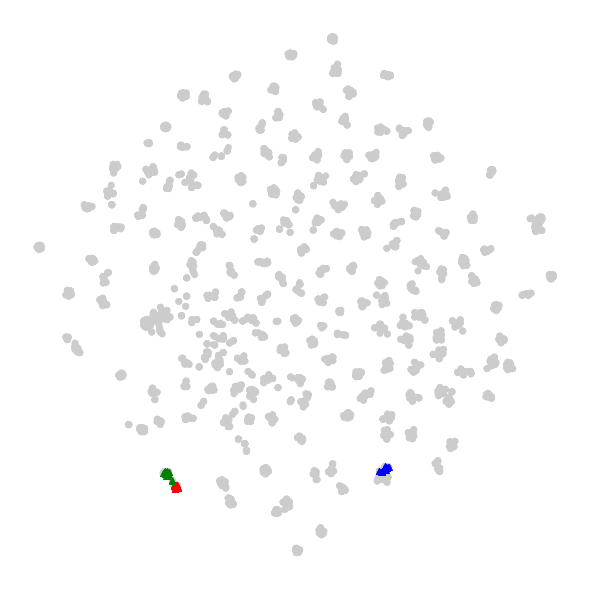

DFDC_1929178 DFDC_2063898
20 20


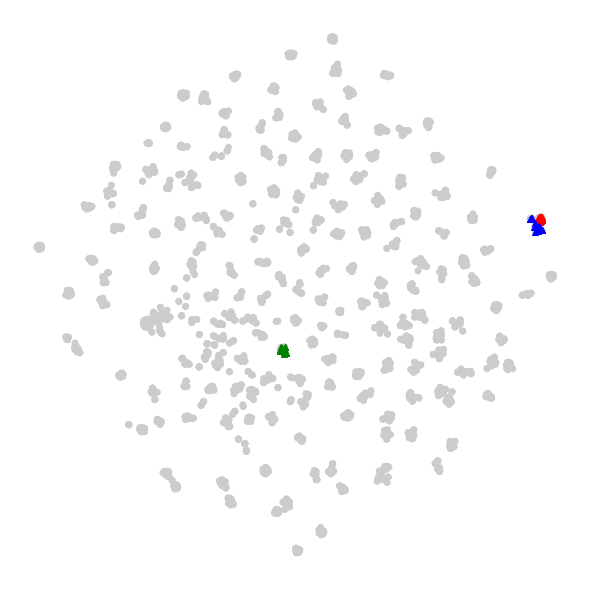

GG_09 GG_07
20 20


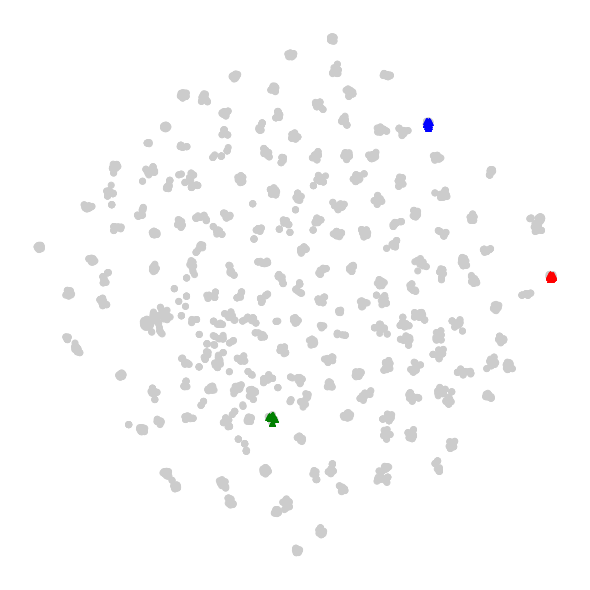

CDF_id1 CDF_id37
20 20


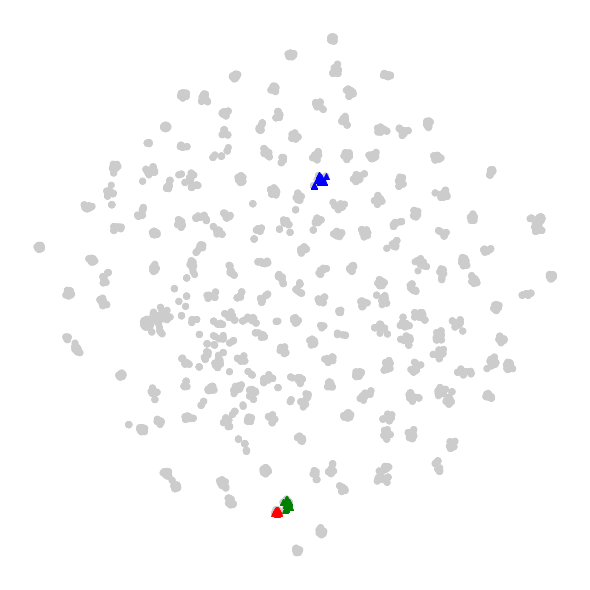

FF_017 FF_803
6 20


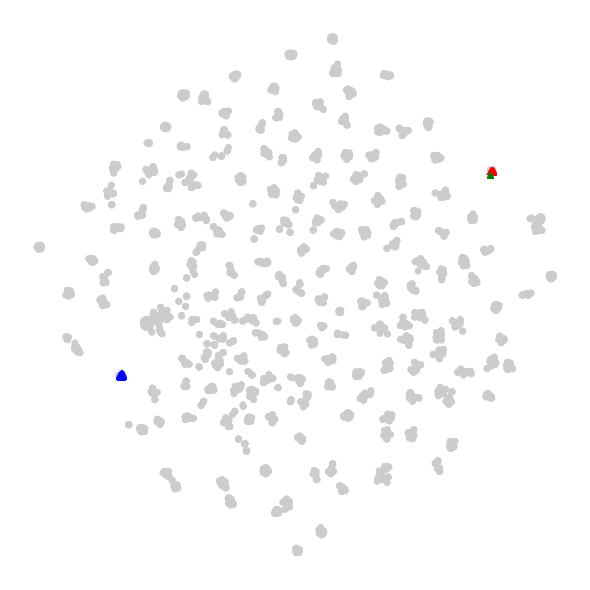

FF_017 FF_017
0 0


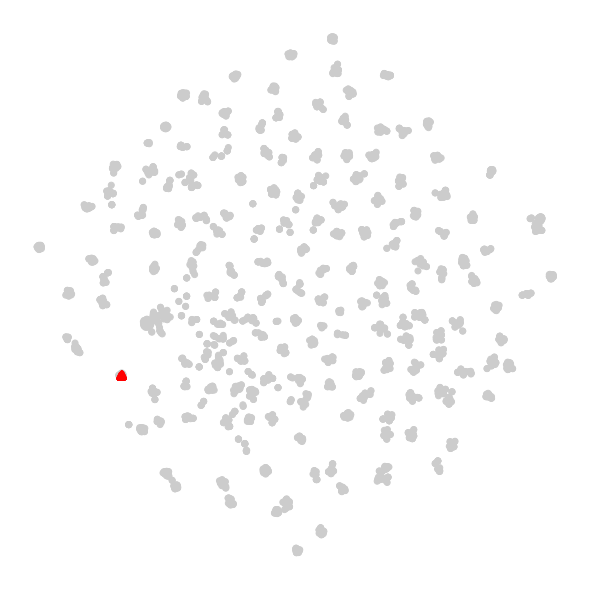

In [8]:

os.makedirs('ECCV20_figures/tsne/', exist_ok=True)
for k in fake_files.keys():
    
    # plot the tsne chart with
    fig, ax = plt.subplots(figsize=(8, 8))
    vgg_repo_metric.plot_tsne(fake_files[k][0], ax)
    plt_title = os.path.splitext('_'.join(fake_files[k][0].split('/')))[0]
    plt.tight_layout(pad=0.0, h_pad=None, w_pad=None, rect=None)
    plt.savefig(f'ECCV20_figures/tsne/{plt_title}.png')
    plt.show()
    

select the file with closest to the mean distance from 

In [ ]:

# need to save the final repo for plotting the figure in the paper
